In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
egov = pd.read_csv('EGOV_DATA_2024.csv')

In [19]:
egov = egov.sort_values(by='Country Name', ascending=True).reset_index(drop=True)

In [20]:
pib = pd.read_excel('imf_government_expenditure.xls')

In [21]:
pib = pib.sort_values(by='Country', ascending=True).reset_index(drop=True)

In [22]:
set(pib['Country']).difference(egov['Country Name'])

{'Aruba',
 "China, People's Republic of",
 'Georgia',
 'Hong Kong SAR',
 'Iran',
 'Korea, Republic of',
 'Kyrgyz Republic',
 'Micronesia, Fed. States of',
 'Moldova',
 'Republic of Congo',
 'Slovak Republic',
 'Tanzania',
 'Türkiye, Republic of',
 'United Kingdom',
 'United States',
 'Vietnam'}

In [23]:
pib['Country'] = pib['Country'].replace({
    "China, People's Republic of": 'China',
    'Georgia': 'Georgia (Country)',
    'Iran': 'Iran (Islamic Republic of)',
    'Korea, Republic of': 'Republic of Korea',
    'Micronesia, Fed. States of': 'Micronesia (Federated States of)',
    'Moldova': 'Republic of Moldova',
    'Republic of Congo': 'Congo',
    'Slovak Republic': 'Slovakia',
    'Tanzania': 'United Republic of Tanzania',
    'Türkiye, Republic of': 'Türkiye',
    'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
    "United States": "United States of America",
    'Vietnam': 'Viet Nam',
    'Kyrgyz Republic': 'Kyrgyzstan'
})

In [24]:
set(pib['Country']).difference(egov['Country Name'])

{'Aruba', 'Hong Kong SAR'}

In [25]:
paises = pib['Country'].unique().tolist()

In [26]:
egov = egov[egov['Country Name'].isin(paises)].reset_index(drop=True)

In [27]:
pib = pib.drop(index=[5, 63]).reset_index(drop=True)

In [28]:
df = pd.DataFrame()

In [29]:
df['E-Government Development Index'] = egov['E-Government Index']

In [30]:
df['Gastos públicos (% do PIB)'] = pib['Percentage']

In [31]:
df['Gastos públicos (% do PIB)'] = df['Gastos públicos (% do PIB)']

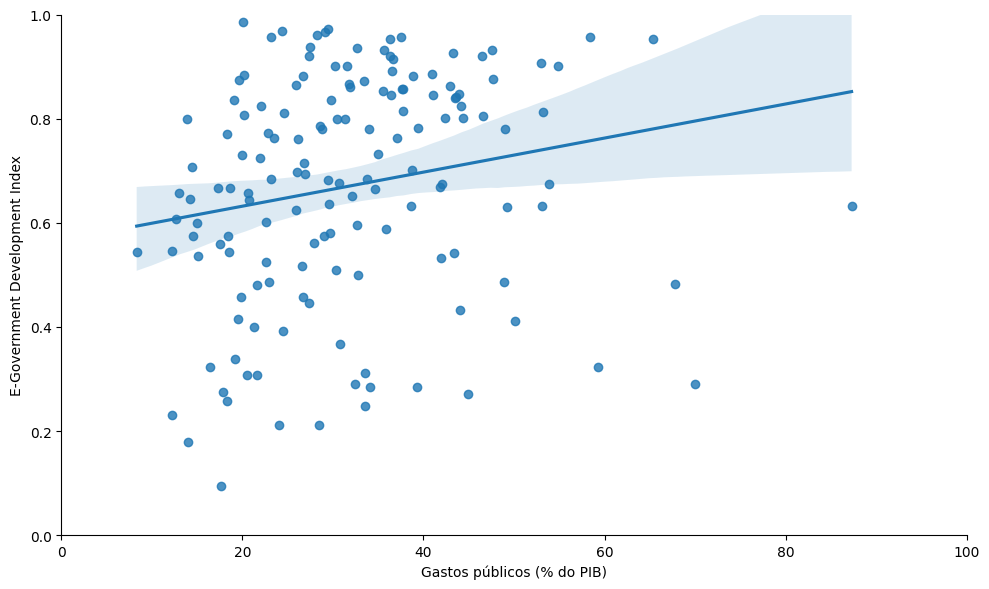

In [32]:
plt.figure(figsize=(10, 6))

sns.regplot(df, x='Gastos públicos (% do PIB)', y='E-Government Development Index')

sns.despine()
plt.xlim(0, 100)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [33]:
df.corr(method='spearman')

,E-Government Development Index,Gastos públicos (% do PIB)
E-Government Development Index,1.000000,0.275864
Gastos públicos (% do PIB),0.275864,1.000000
